# Welcome to introduction of GAN  
before we are going to the course
1. please copy this colab to your google drive  
<img src='https://drive.google.com/uc?id=1wg0HxSKp0o9K66t6h23_mUu5A1L3lbMR' width="350">  
  
because of your editing won't save.  
2. please download course materials from github



In [1]:
!git clone https://github.com/NEWKNP/Introduction_to_GAN.git

Cloning into 'Introduction_to_GAN'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [ ]:
!ls

Introduction_to_GAN  sample_data


# introduct to deep learning

## Percepton
a simple neuron network model

### vector base

>NumPy is a Python library used for working with arrays.
It also has functions for working in domain of linear algebra, and matrices.

>In Python we have lists that serve the purpose of arrays, but NumPy aims to provide an array object that is up to 50x faster than traditional Python lists.  
>Doc: https://numpy.org/doc/stable/user/quickstart.html  
>or use help()

In [2]:
import numpy as np

In [ ]:
# OR problem
X = [[1, 1], [1, -1], [-1, 1], [-1, -1]]
Y = [1, 1, 1, -1]
X = np.hstack((np.array(X), np.ones((len(X), 1)))) # add constant variables column (B)
X

array([[ 1.,  1.,  1.],
       [ 1., -1.,  1.],
       [-1.,  1.,  1.],
       [-1., -1.,  1.]])

In [ ]:
ini_w = X[np.random.randint(0, len(X))].copy() #numpy anounment
ini_w

array([-1.,  1.,  1.])

In [ ]:
np.dot(X[0], ini_w) # 1*(-1) + 1*(-1) + 1*1

1.0

In [ ]:
Y[0] * np.dot(X[0], ini_w) # 1*3

1.0

In [ ]:
print(np.dot(X[3], ini_w)) # (-1)*1 + (-1)*1 + 1*1
print(Y[3] * np.dot(X[3], ini_w)) # (-1)*(-1)

1.0
-1.0


In [ ]:
def perceptron(X, Y, lr=0.1, w=None):
  """
  X = input data
  Y = label
  lr = learning rate
  w = weight or training variables or decision boundary
  Return: decision boundary
  """
  # Homogeneous coordinates
  X = np.hstack((np.array(X), np.ones((len(X), 1)))) # add constant variables column (B)
  if w is None:
    w = X[np.random.randint(0, len(X))].copy() # initial weight
  done = False
  while not done:
    done = True
    for i, x in enumerate(X):      # calculate each data point
      if Y[i] * np.dot(x, w) <= 0: # decision boundary still wrong classify
        w += lr * x * Y[i]         # update weight
        done = False               # set unfinish
  return w

In [ ]:
w = perceptron(X, Y, lr=1e-1)
print(w)

[1.3 0.3 0.7 0.7]


In [ ]:
from matplotlib import pyplot as plt #library for plot
def plot_hyperplane2d(X, Y, w):
  # just plot
  X = np.array(X)
  Y = np.array(Y)
  plt.plot(X[Y==1, 0], X[Y==1, 1], 'go')   # green is 1
  plt.plot(X[Y==-1, 0], X[Y==-1, 1], 'ro') # red is -1
  xlim = plt.gca().get_xlim()
  slope = -w[0] / w[1]
  bias = -w[-1] / w[1]
  plt.plot(xlim, [xlim[0] * slope + bias, xlim[1] * slope + bias], 'b')

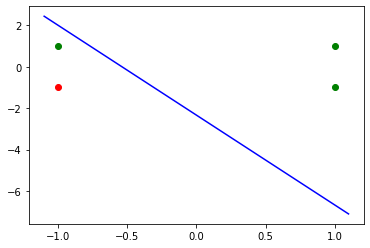

In [ ]:
plot_hyperplane2d(X, Y, w)

### gradient base

Framework  
  
<img src='https://drive.google.com/uc?id=1GYRYLEvCT7QrZOK39TvBbAeKrXnMpph_' width="700"> 

In [4]:
import torch
from torch import nn, Tensor, from_numpy, optim
import torch.nn.functional as F

In [ ]:
# storage
lst = [1,2]
print("List: ", lst)
print("Numpy: ", np.array(lst))
print("Tensor: ", Tensor(lst))

List:  [1, 2]
Numpy:  [1 2]
Tensor:  tensor([1., 2.])


In [ ]:
#do hstack, initial weight, and dot vector
nn.Linear(1,1)

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
input_size = 2 # length of an input
outpur_size = 1 
perceptron_torch = nn.Sequential(
                    nn.Linear(input_size,outpur_size),
                    nn.Tanh()
                  )
perceptron_torch

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Tanh()
)

In [ ]:
# OR problem
X = [[1, 1], [1, -1], [-1, 1], [-1, -1]]
Y = [1, 1, 1, -1]

In [ ]:
X_tensor = Tensor(X)
Y_pred = perceptron_torch(X_tensor) # feed forward
print(Y_pred)
print(torch.round(Y_pred))

tensor([[-0.5041],
        [ 0.6341],
        [-0.8889],
        [-0.1131]], grad_fn=<TanhBackward0>)
tensor([[-1.],
        [ 1.],
        [-1.],
        [-0.]], grad_fn=<RoundBackward0>)


#### learning
how math model become machine learning

Losss function  
TD;LR: Basline  
regression problem: Mean Square Error  
classification problem: Cross Entropy  

You can know about loss on [this](https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23)  
loss function in pytorch: click [here](https://pytorch.org/docs/stable/nn.html#loss-functions)

In [ ]:
def get_loss(Y_pred, Y_test, loss=nn.MSELoss()):
  return loss(Y_pred, Y_test)

In [ ]:
Y_tensor = Tensor(Y).reshape(4,1)
loss = get_loss(Y_pred, Y_tensor, loss=nn.MSELoss())
loss.item()

1.6876214742660522

You can know more about learning optimization on [here](https://github.com/jettify/pytorch-optimizer)

For mathematics click [here](https://www.youtube.com/watch?v=uJryes5Vk1o&list=PLkDaE6sCZn6Ec-XTbcX1uRg2_u4xOEky0&index=10)

In [ ]:
# learning algorithm
optimizer = optim.SGD(perceptron_torch.parameters(), lr=1e-2)

In [ ]:
# training
# Run the training loop
for epoch in range(50000): # 50000 epochs at maximum    
  # Zero the gradients
  optimizer.zero_grad()
      
  # Perform forward pass
  Y_pred = perceptron_torch(X_tensor)
      
  # Compute loss
  loss = get_loss(Y_pred, Y_tensor, loss=nn.MSELoss())
      
  # Perform backward pass
  loss.backward()
      
  # Perform optimization
  optimizer.step()
  
  # Print epoch
  if epoch % 5000 == 0:
    print(f'Epoch {epoch+1} loss: {loss.item()}')

Epoch 1 loss: 1.6876214742660522
Epoch 5001 loss: 0.004373827017843723
Epoch 10001 loss: 0.002088001696392894
Epoch 15001 loss: 0.0013639380922541022
Epoch 20001 loss: 0.0010106898844242096
Epoch 25001 loss: 0.0008019705419428647
Epoch 30001 loss: 0.0006642726366408169
Epoch 35001 loss: 0.0005667562363669276
Epoch 40001 loss: 0.0004940598737448454
Epoch 45001 loss: 0.00043782772263512015


In [ ]:
print(torch.round(Y_pred))
print(Y_tensor)

tensor([[ 1.],
        [ 1.],
        [ 1.],
        [-1.]], grad_fn=<RoundBackward0>)
tensor([[ 1.],
        [ 1.],
        [ 1.],
        [-1.]])


> Note activation function and learning algorithm will discuss later

#### implement as object

In [ ]:
class Perceptron(nn.Module):
  def __init__(self, input_dim, output_dim):
    """
    Params
      input_dim: length of a input data
      output_dim: length of a output (Must be same as Y)
    Define
      fc: neuron layer
      act_func: activation function 
      loss: loss function 
      optimizer: gradient optimizer 
    """
    super(Perceptron, self).__init__()          # inherit class
    self.fc = nn.Linear(input_dim, output_dim)
    self.act_func = nn.Tanh()                   # TanH activation function
    self.criterion = nn.MSELoss()                   # Mean Square error
    self.optimizer = optim.SGD(self.parameters()
                                     , lr=1e-2) # Stochastic gradient descent

  def forward(self, x):
    """
    feed forward the data through each neuron layer
    x: data, type tensor, size 2x1
    """
    x = self.fc(x)
    x = self.act_func(x)
    return x

  def fit(self, X, Y, epochs=500):
    """
    Training loop
    """
    X_tensor = Tensor(X)
    Y_tensor = Tensor(Y).reshape(4,1)
    loss_record = []
    for epoch in range(epochs):
      # Zero the gradients
      self.optimizer.zero_grad()
          
      # Perform forward pass
      Y_pred = self.forward(X_tensor)
          
      # Compute loss
      loss = self.criterion(Y_pred, Y_tensor)
      loss_record.append(loss.item()) #recording the loss
          
      # Perform backward pass
      loss.backward()
          
      # Perform optimization
      self.optimizer.step()
      
      # Print epoch
      if epoch % int(epochs/10) == 0:
        print(f'Epoch {epoch+1} loss: {loss.item()}')

    return loss_record

In [ ]:
or_perceptron = Perceptron(len(X[0]), 1)
history = or_perceptron.fit(X, Y, 10000)

Epoch 1 loss: 1.6121445894241333
Epoch 1001 loss: 0.02551443502306938
Epoch 2001 loss: 0.011782277375459671
Epoch 3001 loss: 0.00755075691267848
Epoch 4001 loss: 0.005526163149625063
Epoch 5001 loss: 0.004346323199570179
Epoch 6001 loss: 0.003576214425265789
Epoch 7001 loss: 0.003034995635971427
Epoch 8001 loss: 0.0026343264617025852
Epoch 9001 loss: 0.0023260070011019707


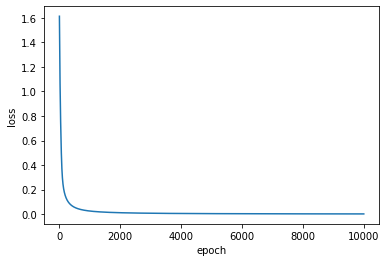

In [ ]:
plt.plot(history)
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.savefig('loss.png')
plt.show()

In [ ]:
Y_pred = or_perceptron.forward(X_tensor)
print(Y_pred)
print(torch.round(Y_pred))
print(Y_tensor)

tensor([[ 1.0000],
        [ 0.9473],
        [ 0.9473],
        [-0.9473]], grad_fn=<TanhBackward0>)
tensor([[ 1.],
        [ 1.],
        [ 1.],
        [-1.]], grad_fn=<RoundBackward0>)
tensor([[ 1.],
        [ 1.],
        [ 1.],
        [-1.]])


## AutoEncoder

In [ ]:
X = np.eye(8).astype(np.float32) # identity matrix
X

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
class Autoencoder(nn.Module):
  def __init__(self, input_dim, output_dim, lr=3.5):
    """
    Params
      input_dim: length of a input data
      output_dim: length of a output (Must be same as Y)
    Define
      fc: neuron layer
      act_func: activation function 
      loss: loss function 
      optimizer: gradient optimizer 
    """
    super(Autoencoder, self).__init__()
    middle_dim = int((input_dim + output_dim)/2)
    self.encoder1 = nn.Linear(input_dim, middle_dim)
    self.encoder2 = nn.Linear(middle_dim, output_dim)
    self.decoder1 = nn.Linear(output_dim, middle_dim)
    self.decoder2 = nn.Linear(middle_dim, input_dim)
    self.act_func = nn.ReLU()
    self.decision = nn.Sigmoid()
    self.loss = nn.BCELoss()
    self.optimizer = optim.SGD(self.parameters(), lr=lr)

  def forward(self, x):
    """
    feed forward the data through each neuron layers
    x: data, type tensor
    """
    x = self.encode(x)
    x = self.decode(x)
    return x

  def encode(self, x):
    """
    encoding input data
    """
    x = self.encoder1(x)
    x = self.act_func(x)
    x = self.encoder2(x)
    return self.decision(x)

  def decode(self, x):
    """
    decoding input data
    """
    x = self.decoder1(x)
    x = self.act_func(x)
    x = self.decoder2(x)
    return self.decision(x)

  def get_loss(self, Y_pred, Y_test):
    """
    compute loss between our predict and label
    """
    return self.loss(Y_pred, Y_test)

  def fit(self, X, Y, epochs=500):
    """
    Training loop
    """
    X_tensor = from_numpy(X)
    Y_tensor = from_numpy(Y)
    loss_record = []
    for epoch in range(epochs):
      # Zero the gradients
      self.optimizer.zero_grad()
          
      # Perform forward pass
      Y_pred = self.forward(X_tensor)
          
      # Compute loss
      loss = self.get_loss(Y_pred, Y_tensor)
      loss_record.append(loss.item()) #recording the loss
          
      # Perform backward pass
      loss.backward()
          
      # Perform optimization
      self.optimizer.step()
      
      # Print epoch
      if epoch % int(epochs/10) == 0:
        print(f'Epoch {epoch+1} loss: {loss.item()}')

    return loss_record

In [ ]:
import math

In [ ]:
input_dim = '8' #@param ["8", "16", "32"]
input_dim = int(input_dim)
latent_dim = int(math.log2(input_dim))
X = np.eye(input_dim).astype(np.float32) # identity matrix
autoencoder = Autoencoder(input_dim, latent_dim)
latent = autoencoder.encode(torch.from_numpy(X))
torch.round(latent)

tensor([[0., 0., 1., 1., 0.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 0.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 0.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 0.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 0.],
        [0., 0., 1., 1., 0.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1.]], grad_fn=<RoundBackward0>)

In [ ]:
new_X = autoencoder.decode(latent)
torch.round(new_X)

tensor([[0., 1., 1.,  ..., 0., 0., 1.],
        [0., 1., 1.,  ..., 0., 0., 1.],
        [0., 1., 1.,  ..., 0., 0., 1.],
        ...,
        [0., 1., 1.,  ..., 0., 0., 1.],
        [0., 1., 1.,  ..., 0., 0., 1.],
        [0., 1., 1.,  ..., 0., 0., 1.]], grad_fn=<RoundBackward0>)

In [ ]:
autoencoder = Autoencoder(input_dim, latent_dim, 3.5) # declare autoencoder object
history = autoencoder.fit(X, X, 5001)                 # train

Epoch 1 loss: 0.6895006895065308
Epoch 501 loss: 0.13900825381278992
Epoch 1001 loss: 0.1388782113790512
Epoch 1501 loss: 0.1373598277568817
Epoch 2001 loss: 0.11600010097026825
Epoch 2501 loss: 0.11068779975175858
Epoch 3001 loss: 0.1011127233505249
Epoch 3501 loss: 0.07463885843753815
Epoch 4001 loss: 0.0522056445479393
Epoch 4501 loss: 0.029942873865365982
Epoch 5001 loss: 0.015341535210609436


In [ ]:
latent = autoencoder.encode(torch.from_numpy(X))
torch.round(latent)

tensor([[0., 1., 0., 0., 1.],
        [1., 0., 1., 0., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 0.],
        [0., 1., 0., 1., 0.],
        [1., 0., 0., 1., 0.],
        [1., 1., 0., 1., 0.],
        [1., 0., 0., 1., 0.],
        [1., 1., 1., 0., 0.],
        [0., 1., 1., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 1., 1., 1.],
        [1., 0., 1., 1., 0.],
        [1., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 1., 1.],
        [0., 1., 1., 0., 1.],
        [0., 1., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 1., 1.],
        [0., 1., 0., 1., 1.],
        [0., 1., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 1.],
        [1., 1., 1., 0., 1.],
        [0., 0., 1., 1., 0.],
        [1., 1., 0., 1., 0.],
        [1., 0., 1., 1., 0.],
        [1., 0., 1., 1., 0.],
        [0., 0., 1., 1., 1.],
        [1., 0., 0., 1., 0.],
        [0., 1., 0., 1., 0.]], grad_fn=<RoundBackward0>)

In [ ]:
new_X = autoencoder.decode(latent)
torch.round(new_X)

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]], grad_fn=<RoundBackward0>)

# Vanilla GAN

## constuct vanilla GAN

<img src='https://drive.google.com/uc?id=1j_kBzQWbXywwBIKWvLUl57WDoZiNsh2W' width="500"> 

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # training mode 

In [6]:
class Generator(nn.Module):
  def __init__(self):
    """
    Similar decoder
    """
    super(Generator, self).__init__()
    self.n_features = 128
    self.n_out = 784
    self.fc0 = nn.Sequential(
                nn.Linear(self.n_features, 256), 
                nn.LeakyReLU(0.2)
                )
    self.fc1 = nn.Sequential(
                nn.Linear(256, 512),
                nn.LeakyReLU(0.2)
                )
    self.fc2 = nn.Sequential(
                nn.Linear(512, 1024),
                nn.LeakyReLU(0.2)
                )
    self.fc3 = nn.Sequential(
                nn.Linear(1024, self.n_out),
                nn.Tanh()
                )
  def forward(self, x):
    """
    feed forward the data through each neuron layers
    x: data, type tensor
    """
    x = self.fc0(x)
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.fc3(x)
    x = x.view(-1, 1, 28, 28) # reshape
    return x

class Discriminator(nn.Module):
  def __init__(self):
    """
    Similar Encoder
    """
    super(Discriminator, self).__init__()
    self.n_in = 784
    self.n_out = 1
    self.fc0 = nn.Sequential(
                nn.Linear(self.n_in, 1024),
                nn.LeakyReLU(0.2),
                nn.Dropout(0.3)
                )
    self.fc1 = nn.Sequential(
                nn.Linear(1024, 512),
                nn.LeakyReLU(0.2),
                nn.Dropout(0.3)
                )
    self.fc2 = nn.Sequential(
                nn.Linear(512, 256),
                nn.LeakyReLU(0.2),
                nn.Dropout(0.3)
                )
    self.fc3 = nn.Sequential(
                nn.Linear(256, self.n_out),
                nn.Sigmoid()
                )
  def forward(self, x):
    """
    feed forward the data through each neuron layers
    x: data, type tensor
    """
    x = x.view(-1, 784) # Flatten
    x = self.fc0(x)
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.fc3(x)
    return x

In [18]:
from time import sleep
from tqdm import tqdm
from torch.autograd.variable import Variable
from torchvision.utils import make_grid

class VanillaGAN(nn.Module):
  def __init__(self):
    """
    Similar autoencoder
    But
      encoder -> discriminator
      decoder -> generator
    """
    super(VanillaGAN, self).__init__()
    self.generator = Generator().to(device)
    self.discriminator = Discriminator().to(device)
    self.g_optim = optim.Adam(self.generator.parameters(), lr=2e-4)
    self.d_optim = optim.Adam(self.discriminator.parameters(), lr=2e-4)
    self.criterion = nn.BCELoss() # Binary Cross Entropy loss function

  def noise(self, size, n_features=128):
    return Variable(torch.randn(size, n_features)).to(device)

  def make_ones(self, size):
    return Variable(torch.ones(size, 1)).to(device)

  def make_zeros(self, size):
    return Variable(torch.zeros(size, 1)).to(device)

  def generate(self, n=25):
    return self.generator(self.noise(n))

  def train_discriminator(self, real_data, fake_data):
    # get vector size
    n = real_data.size(0)

    # prevent accumulate loss after through an epoch
    self.d_optim.zero_grad()
    
    # Step 2.1
    prediction_real = self.discriminator(real_data)
    error_real = self.criterion(prediction_real, self.make_ones(n))
    error_real.backward()

    # Step 2.2
    prediction_fake = self.discriminator(fake_data)
    error_fake = self.criterion(prediction_fake, self.make_zeros(n))
    error_fake.backward()

    # Perform optimization
    self.d_optim.step()

    # Step 2.3
    return error_real + error_fake

  def train_generator(self, fake_data):
    # get vector size
    n = fake_data.size(0)

    # prevent accumulate loss after through an epoch
    self.g_optim.zero_grad()
      
    # Step 3
    prediction = self.discriminator(fake_data)
    error = self.criterion(prediction, self.make_ones(n))
    
    # Perform backward pass
    error.backward()
    # Perform optimization
    self.g_optim.step()

    return error 

  def training_loop(self, trainloader, num_epochs=100, k=1):
    # for generate output images
    test_noise = self.noise(64)
    generate_images = []

    # histories
    g_losses = []
    d_losses = []

    # set to training mode
    self.generator.train()
    self.discriminator.train()

    # iterate cover dataset
    for epoch in range(num_epochs):
      with tqdm(trainloader, unit="batch") as tepoch:
        tepoch.set_description(f"Epoch {epoch+1}")

        # reset loss
        g_error = 0.0   
        d_error = 0.0

        # iterate each batch
        for i, data in enumerate(tepoch):
          tepoch.update(1)
          sleep(0.5)
          imgs, _ = data
          n = len(imgs)
          real_data = imgs.to(device)
          # train discriminator in k steps (with the same real data)
          for j in range(k):
            # generate latent (Step 1.)
            fake_data = self.generator(self.noise(n)).detach()
            # train discriminator (Step 2.)
            d_error += self.train_discriminator(real_data, fake_data)
          # generate another latent
          fake_data = self.generator(self.noise(n))
          # train generator (Step 3.)
          g_error += self.train_generator(fake_data)
          tepoch.set_postfix({'Batch': i+1, 'G loss (in progress)': g_error.item()/(i+1),
                              'D loss (in progress)': d_error.item()/(i+1)})

        img = self.generator(test_noise).cpu().detach()
        img = make_grid(img)
        generate_images.append(img)
        sleep(0.5)
        g_losses.append(g_error.item()/i)   
        d_losses.append(d_error.item()/i)
        tepoch.set_postfix({'G loss (final)': g_error.item()/i, 
                            'D loss (final)': d_error.item()/i})
        sleep(0.1)
        #print('Epoch {}: g_loss: {:.8f} d_loss: {:.8f}\r'.format(epoch, g_error/i, d_error/i))
        
    print('Training Finished')
    torch.save(self.generator.state_dict(), 'mnist_generator.pth')
    return g_losses, d_losses, generate_images

Mathematics for training GAN: [here](https://jaketae.github.io/study/gan-math/) or [this video](https://www.youtube.com/watch?v=Gib_kiXgnvA)

## MNIST data

In [15]:
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

# Load MNIST data by their frameworks
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,),(0.5,))
                ])
to_image = transforms.ToPILImage()
trainset = MNIST(root='./data/', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=100, shuffle=True)

In [10]:
examples = enumerate(trainloader)
batch_idx, (example_data, example_targets) = next(examples)

#fig = plt.figure()
plt.imshow(example_data[0][0], cmap='gray', interpolation='none')
plt.title("Ground Truth: {}".format(example_targets[0]))
plt.xticks([])
plt.yticks([])

NameError: ignored

In [19]:
gan = VanillaGAN()
g_losses, d_losses, images = gan.training_loop(trainloader, 25)

Epoch 1: 100%|██████████| 1/1 [00:42<00:00, 42.96s/batch, Batch=1, G loss (in progress)=0.689, D loss (in progress)=1.36]


<class 'torch.Tensor'> 0.689077615737915


ZeroDivisionError: ignored

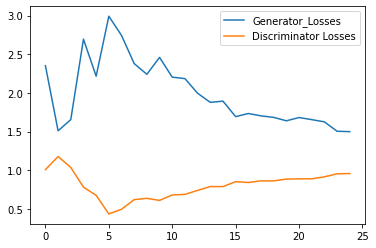

In [ ]:
import imageio
imgs = [np.array(to_image(i)) for i in images]
imageio.mimsave('progress.gif', imgs)
plt.plot(g_losses, label='Generator_Losses')
plt.plot(d_losses, label='Discriminator Losses')
plt.legend()
plt.savefig('loss.png')

## usage

In [ ]:
trained_generator = Generator()
trained_generator.load_state_dict(torch.load('Introduction_to_GAN/mnist_generator.pth'))
trained_generator.eval()

Generator(
  (fc0): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (fc1): Sequential(
    (0): Linear(in_features=256, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (fc2): Sequential(
    (0): Linear(in_features=512, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (fc3): Sequential(
    (0): Linear(in_features=1024, out_features=784, bias=True)
    (1): Tanh()
  )
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


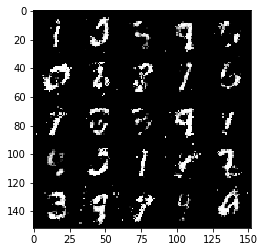

In [ ]:
noise = Variable(torch.randn(25, 128)).to(device)
generated = trained_generator(noise)
grid_img = make_grid(generated, nrow=5)
plt.imshow(grid_img.permute(1, 2, 0), cmap='gray', interpolation='none')

# Computer vision

## limit of multi perceptron

In [ ]:
example_image = example_data[0][0]
print(example_image)

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000

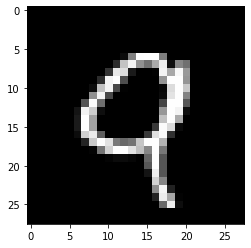

In [ ]:
plt.imshow(example_image, cmap='gray', interpolation='none')

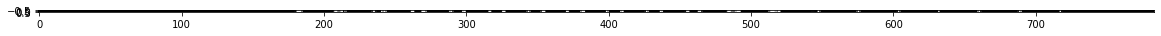

In [ ]:
flat_image = example_image.view(-1, 784)
plt.figure(figsize=(20,100))
plt.imshow(flat_image, cmap='gray', interpolation='none')

## Preprocess

### point processing

In [ ]:
255 - example_image # miracle of tensor

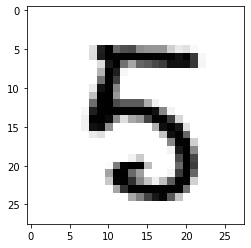

In [ ]:
negImg = 255 - example_image
plt.imshow(negImg, cmap='gray', interpolation='none')

### local processing
Local processing calculates a new brightness of a pixel using
the properties of its local neighbors.

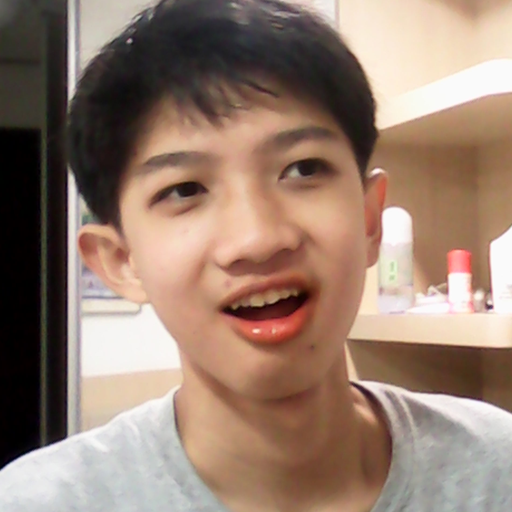

In [ ]:
from PIL import Image
img1 = Image.open('Introduction_to_GAN/korean_boyz.png')
img1

In [ ]:
np.array(img1).shape

(512, 512, 3)

### Filter
Filter or convolution mask is

In [ ]:
nb_channels = 3
convert_tensor = transforms.ToTensor()
img1_tensor = convert_tensor(img1)
img1_tensor = img1_tensor.view(1, img1_tensor.size()[0],
                img1_tensor.size()[1], img1_tensor.size()[2])
weights = torch.tensor([[-1., -1., -1.],  # kernel 
                        [-1.,  8., -1.],
                        [-1., -1., -1.]])
# duplicate kernel for 3-channels image 
weights = weights.view(1, 1, 3, 3).repeat(1, nb_channels, 1, 1)
weights

tensor([[[[-1., -1., -1.],
          [-1.,  8., -1.],
          [-1., -1., -1.]],

         [[-1., -1., -1.],
          [-1.,  8., -1.],
          [-1., -1., -1.]],

         [[-1., -1., -1.],
          [-1.,  8., -1.],
          [-1., -1., -1.]]]])

In [ ]:
output = nn.functional.conv2d(img1_tensor, weights, padding=1)
output.size()

torch.Size([1, 1, 512, 512])

In [ ]:
# squeeze (reduce dimention)
print(output.size())
print(torch.squeeze(output, 1).size())

torch.Size([1, 1, 512, 512])
torch.Size([1, 512, 512])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


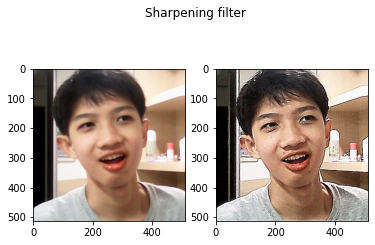

In [ ]:
for_plot = torch.squeeze(output, 1) + torch.squeeze(img1_tensor)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Sharpening filter')
ax1.imshow(torch.squeeze(img1_tensor).permute(1, 2, 0))
ax2.imshow(for_plot.permute(1, 2, 0))

Filter in CNN is training parameters

### activation function

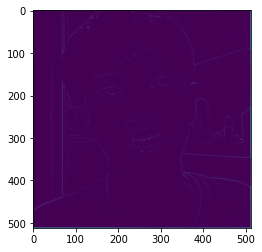

In [ ]:
relu = nn.ReLU()
output_relu = relu(output)
plt.imshow(torch.squeeze(output_relu))

### downsampling

In [ ]:
maxpooling = nn.MaxPool2d(3, stride=3)
output_pooling = maxpooling(output_relu)
output_pooling.size()

torch.Size([1, 1, 170, 170])

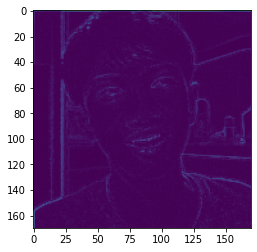

In [ ]:
plt.imshow(torch.squeeze(output_pooling))

## vanila CNN
CNN is

In [ ]:
class VanillaCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(
                in_channels=1,              
                out_channels=16, # 16 filters           
                kernel_size=5,   # filter 5x5            
                stride=1,                   
                padding=2,
                )
    self.relu = nn.ReLU()
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(16, 32, 5, 1, 2)
    self.fc1 = nn.Linear(32 * 7 * 7, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

    self.criterion = nn.CrossEntropyLoss()
    self.optimizer = optim.SGD(self.parameters(), lr=0.001, momentum=0.9)

  def forward(self, x):
    # ConvNet 1
    x = self.conv1(x) #-> 28 * 28 * 16
    x = self.relu(x)  
    x = self.pool(x)  #-> 14 * 14 * 16
    # ConvNet 2
    x = self.conv2(x) #-> 14 * 14 * 32
    x = self.relu(x)
    x = self.pool(x)  #-> 7 * 7 * 32
    # flatten all dimensions except batch
    x = torch.flatten(x, 1)
    # Fully connect (multi perceptron)
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    return F.log_softmax(x)

  def trainingloop(self, trainloader, epochs):
    """
    Training loop
    """
    loss_record = []
    for epoch in range(epochs):
      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        X, Y = data

        # Zero the gradients
        self.optimizer.zero_grad()
            
        # Perform forward pass
        Y_pred = self.forward(X)
            
        # Compute loss
        loss = self.criterion(Y_pred, Y)
        running_loss += loss.item()
            
        # Perform backward pass
        loss.backward()
            
        # Perform optimization
        self.optimizer.step()
        
        # Print epoch
        if i % 100 == 0:    # print every 2000 mini-batches
          print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
          loss_record.append(running_loss) #recording the loss
          running_loss = 0.0

    return loss_record

cnn1 = VanillaCNN()

In [ ]:
history = cnn1.trainingloop(trainloader, 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


[1,     1] loss: 0.001
[1,   101] loss: 0.115
[1,   201] loss: 0.114
[1,   301] loss: 0.114
[1,   401] loss: 0.112
[1,   501] loss: 0.107
[2,     1] loss: 0.001
[2,   101] loss: 0.051
[2,   201] loss: 0.032
[2,   301] loss: 0.023
[2,   401] loss: 0.018
[2,   501] loss: 0.016
[3,     1] loss: 0.000
[3,   101] loss: 0.013
[3,   201] loss: 0.012
[3,   301] loss: 0.010
[3,   401] loss: 0.010
[3,   501] loss: 0.009
[4,     1] loss: 0.000
[4,   101] loss: 0.008
[4,   201] loss: 0.008
[4,   301] loss: 0.008
[4,   401] loss: 0.007
[4,   501] loss: 0.007
[5,     1] loss: 0.000
[5,   101] loss: 0.006
[5,   201] loss: 0.006
[5,   301] loss: 0.007
[5,   401] loss: 0.005
[5,   501] loss: 0.006


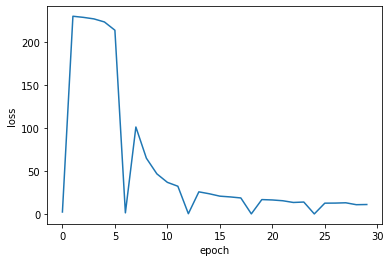

In [ ]:
plt.plot(history)
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.savefig('loss.png')
plt.show()

### prediction

In [ ]:
pred = cnn1.forward(example_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
_, predicted = torch.max(pred, 1)
predicted

tensor([9, 9, 4, 4, 9, 8, 9, 7, 8, 2, 4, 2, 1, 9, 2, 3, 6, 5, 0, 6, 7, 6, 2, 1,
        9, 1, 0, 9, 0, 2, 9, 4, 0, 9, 6, 1, 7, 1, 1, 9, 7, 7, 5, 2, 8, 1, 6, 7,
        7, 2, 1, 7, 1, 2, 9, 1, 4, 0, 2, 2, 1, 0, 0, 9, 0, 0, 3, 0, 8, 0, 5, 2,
        4, 4, 3, 0, 3, 9, 9, 5, 5, 0, 3, 2, 6, 1, 2, 6, 3, 0, 6, 4, 4, 2, 1, 9,
        0, 5, 6, 2])

In [ ]:
example_targets

tensor([9, 9, 4, 4, 9, 8, 9, 7, 8, 2, 4, 2, 1, 9, 2, 3, 6, 5, 0, 6, 7, 6, 2, 1,
        9, 1, 0, 9, 0, 2, 4, 4, 0, 9, 6, 1, 7, 1, 1, 9, 7, 7, 5, 2, 8, 1, 6, 7,
        7, 9, 1, 7, 1, 8, 9, 1, 4, 0, 2, 2, 1, 0, 0, 9, 0, 0, 3, 0, 8, 0, 5, 2,
        4, 4, 3, 0, 3, 9, 9, 5, 5, 0, 3, 2, 6, 1, 2, 6, 3, 0, 6, 4, 4, 2, 1, 9,
        0, 5, 6, 2])

In [ ]:
print(f'Accuracy: {(predicted == example_targets).sum().item()} %')

Accuracy: 97 %


In [ ]:
# save model
PATH = './mnist_net.pth'
torch.save(cnn1.state_dict(), PATH)

# DCGAN

## upsampling

In [ ]:
upsampling = nn.Upsample(scale_factor=3,mode='nearest')
output_upsampling = upsampling(img1_tensor)
print(img1_tensor.size())
print(output_upsampling.squeeze().size())

torch.Size([1, 3, 512, 512])
torch.Size([3, 1536, 1536])


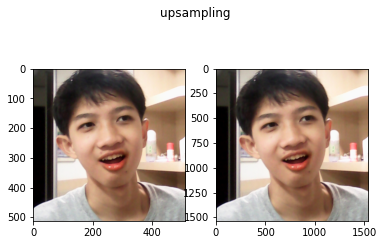

In [ ]:
fig, (ax3, ax4) = plt.subplots(1, 2)
fig.suptitle('upsampling')
ax3.imshow(img1_tensor.squeeze().permute(1, 2, 0))
ax4.imshow(output_upsampling.squeeze().permute(1, 2, 0))

## ConvTranspose2D

In [ ]:
convtranspose2d = nn.ConvTranspose2d(in_channels=3, 
                                     out_channels=3, 
                                     kernel_size=4, 
                                     stride=3,)      # expand size
output_convt2d = convtranspose2d(img1_tensor)
output_convt2d.size()

torch.Size([1, 3, 1537, 1537])

In [ ]:
output_convt2d.squeeze().permute(1, 2, 0).size()

torch.Size([1537, 1537, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


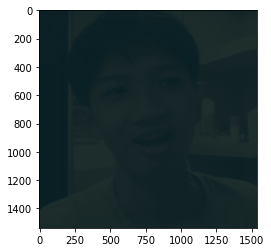

In [ ]:
# detach eturns a new tensor that doesn't require a gradient. 
plt.imshow( output_convt2d.detach().squeeze().permute(1, 2, 0) )

## DCGAN

In [ ]:
# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 256

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 28

# Number of channels in the training images. For color images this is 3
nc = 1

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Learning rate for optimizers
lr = 2e-4

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

In [ ]:
class ConvGenerator(nn.Module):
    def __init__(self, ngpu):
        super(ConvGenerator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 4, 3, 2, 0, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 4 x 4
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 3, 2, 0, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 8 x 8
            nn.ConvTranspose2d( ngf * 2, ngf, 3, 2, 0, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 16 x 16
            nn.ConvTranspose2d( ngf, nc, 3, 2, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 28 x 28
        )

    def forward(self, input):
        return self.main(input)

class ConvDiscriminator(nn.Module):
    def __init__(self, ngpu):
        super(ConvDiscriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 28 x 28
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 14 x 14
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 7 x 7
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 4 x 4
            nn.Conv2d(ndf * 4, 1, 4, 2, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [ ]:
conv_G = ConvGenerator(ngpu).to(device)
conv_G.eval()

ConvGenerator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 256, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(64, 1, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2), output_padding=(1, 1), bias=False)
    (10): Tanh()
  )
)

In [ ]:
conv_D = ConvDiscriminator(ngpu).to(device)
conv_D.eval()

ConvDiscriminator(
  (main): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): Sigmoid()
  )
)

In [ ]:
class DCGAN(nn.Module):
  def __init__(self):
    """
    Similar Vanilla GAN
    """
    super(DCGAN, self).__init__()
    self.generator = ConvGenerator(ngpu).to(device)
    self.discriminator = ConvDiscriminator(ngpu).to(device)
    # Handle multi-gpu if desired
    if (device.type == 'cuda') and (ngpu > 1):
        self.generator = nn.DataParallel(self.generator, list(range(ngpu)))
        self.discriminator = nn.DataParallel(self.discriminator, list(range(ngpu)))
    # loss function
    self.criterion = nn.BCELoss() 
    # optimizer
    self.g_optim = optim.Adam(self.generator.parameters(), lr=lr, betas=(beta1, 0.999))
    self.d_optim = optim.Adam(self.discriminator.parameters(), lr=lr, betas=(beta1, 0.999))
    
  def noise(self, size):
    #return Variable(torch.randn(size, n_features)).to(device)
    return torch.randn(size, nz, 1, 1, device=device)

  def make_ones(self, size):
    #return Variable(torch.ones(size, 1)).to(device)
    return torch.full((size,), 1., device=device)

  def make_zeros(self, size):
    #return Variable(torch.zeros(size, 1)).to(device)
    return torch.full((size,), 0., device=device)

  def generate(self, n=25):
    return self.generator(self.noise(n))

  def train_discriminator(self, real_data, fake_data):
    # get vector size
    n = real_data.size(0)

    # prevent accumulate loss after through an epoch
    self.d_optim.zero_grad()
    
    # Step 2.1
    prediction_real = self.discriminator(real_data)
    prediction_real = prediction_real.view(-1)
    error_real = self.criterion(prediction_real, self.make_ones(n))
    error_real.backward()

    # Step 2.2
    prediction_fake = self.discriminator(fake_data)
    prediction_fake = prediction_fake.view(-1)
    error_fake = self.criterion(prediction_fake, self.make_zeros(n))
    error_fake.backward()

    # Perform optimization
    self.d_optim.step()
    
    # Step 2.3
    return error_real + error_fake

  def train_generator(self, fake_data):
    # get vector size
    n = fake_data.size(0)

    # prevent accumulate loss after through an epoch
    self.g_optim.zero_grad()
      
    # Step 3
    prediction = self.discriminator(fake_data)
    prediction = prediction.view(-1) # remove the dimensions of input of size 1
    error = self.criterion(prediction, self.make_ones(n))
    error.backward()

    # Perform optimization
    self.g_optim.step()
      
    return error 

  def training_loop(self, trainloader, num_epochs=100):
    k = 1
    # for generate output images
    test_noise = self.noise(64)
    generate_images = []

    # histories
    g_losses = []
    d_losses = []

    # set to training mode
    self.generator.train()
    self.discriminator.train()

    # iterate cover dataset
    for epoch in range(num_epochs):
      # reset loss
      g_error = 0.0   
      d_error = 0.0

      # iterate each batch
      for i, data in enumerate(trainloader):
        imgs, _ = data
        n = len(imgs)
        real_data = imgs.to(device)
        # train discriminator in k steps (with the same real data)
        for j in range(k):
          # generate latent (Step 1.)
          fake_data = self.generator(self.noise(n)).detach()
          # train discriminator (Step 2.)
          d_error += self.train_discriminator(real_data, fake_data)
        # generate another latent
        fake_data = self.generator(self.noise(n))
        # train generator (Step 3.)
        g_error += self.train_generator(fake_data)

      img = self.generator(test_noise).cpu().detach()
      img = make_grid(img)
      generate_images.append(img)
      g_losses.append(g_error.item()/i)
      d_losses.append(d_error.item()/i)
      print('Epoch {}: g_loss: {:.8f} d_loss: {:.8f}\r'.format(epoch, g_error/i, d_error/i))
        
    print('Training Finished')
    torch.save(self.generator.state_dict(), 'mnist_convgenerator.pth')
    return g_losses, d_losses, generate_images

In [ ]:
dcgan = DCGAN()
g_losses, d_losses, images = dcgan.training_loop(trainloader, 25)

Epoch 0: g_loss: 4.50504971 d_loss: 0.35453543
Epoch 1: g_loss: 1.92808592 d_loss: 0.66623020
Epoch 2: g_loss: 2.11833167 d_loss: 0.55691093
Epoch 3: g_loss: 2.14716315 d_loss: 0.56802696
Epoch 4: g_loss: 2.19363856 d_loss: 0.53839648
Epoch 5: g_loss: 2.29607630 d_loss: 0.51302183
Epoch 6: g_loss: 2.34220552 d_loss: 0.49198326
Epoch 7: g_loss: 2.38309383 d_loss: 0.50654268
Epoch 8: g_loss: 2.38851357 d_loss: 0.48289156
Epoch 9: g_loss: 2.54884195 d_loss: 0.44016746
Epoch 10: g_loss: 2.54103088 d_loss: 0.45051843
Epoch 11: g_loss: 2.55285072 d_loss: 0.44769099
Epoch 12: g_loss: 2.62233400 d_loss: 0.42937097
Epoch 13: g_loss: 2.65248728 d_loss: 0.41595766
Epoch 14: g_loss: 2.72057176 d_loss: 0.40646598
Epoch 15: g_loss: 2.75441980 d_loss: 0.39162877
Epoch 16: g_loss: 2.76314712 d_loss: 0.40573385
Epoch 17: g_loss: 2.84697723 d_loss: 0.37578115
Epoch 18: g_loss: 2.80912924 d_loss: 0.36858410
Epoch 19: g_loss: 2.86248779 d_loss: 0.38197172
Epoch 20: g_loss: 2.97833633 d_loss: 0.35351562
Ep

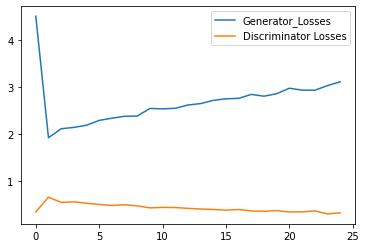

In [ ]:
plt.plot(g_losses, label='Generator_Losses')
plt.plot(d_losses, label='Discriminator Losses')
plt.legend()

In [ ]:
trained_convgenerator = ConvGenerator(ngpu)
trained_convgenerator.load_state_dict(torch.load('Introduction_to_GAN/mnist_convgenerator.pth'))
trained_convgenerator.eval()

ConvGenerator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 256, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(64, 1, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2), output_padding=(1, 1), bias=False)
    (10): Tanh()
  )
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


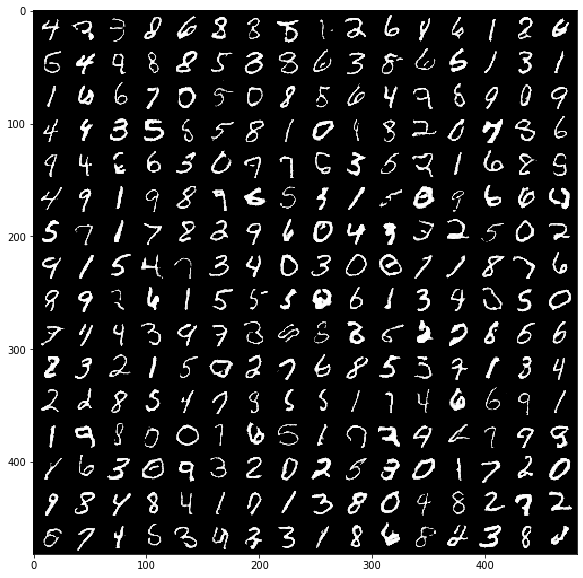

In [ ]:
noise = Variable(torch.randn(256, 100, 1, 1)).to(device)
generated = trained_convgenerator(noise)
grid_img = make_grid(generated, nrow=16)
plt.figure(figsize=(10,10))
plt.imshow(grid_img.permute(1, 2, 0), cmap='gray', interpolation='none')